In [ ]:
import qcodes as qc
import pyvisa
from time import sleep
# Matplot plots
import matplotlib.pyplot as plt
from qcodes.dataset import (
    LinSweep,
    Measurement,
    do1d,
    experiments,
    initialise_or_create_database_at,
    load_by_run_spec,
    load_or_create_experiment,
    plot_dataset,
)

from cappy.config import TEST_STATION_CONFIG, qc_dbpath

In [2]:
rm = pyvisa.ResourceManager()
rm.list_resources()

('TCPIP0::169.254.1.5::inst0::INSTR',
 'TCPIP0::169.254.169.1::inst0::INSTR',
 'ASRL1::INSTR',
 'ASRL3::INSTR',
 'ASRL6::INSTR')

In [ ]:
container = qc.Station(config_file=str(TEST_STATION_CONFIG))
li = container.load_lockin()
yoko = container.load_yoko()

Connected to: Stanford_Research_Systems SR860 (serial:005278, firmware:V1.51) in 0.21s


[yoko(YokogawaGS820)] Could not connect at TCPIP0::169.254.169.1::inst0::INSTR
Traceback (most recent call last):
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\qcodes\instrument\visa.py", line 214, in _connect_and_handle_error
    visa_handle, visabackend, resource_manager = self._open_resource(
                                                 ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\qcodes\instrument\visa.py", line 242, in _open_resource
    resource = resource_manager.open_resource(address)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyvisa\highlevel.py", line 3292, in open_resource
    res.open(access_mode, open_timeout)
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyvisa\resources\resource.py", line 281, in open
    self.session, status = sel

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

In [4]:
# Global Constants 
SAMPLE_NAME = "test"
EXP_NAME="yoko_sr_sweep"
START = 0 
STOP = 5
SAMPLES = 20
INT_TIME = 0.4

In [5]:
# setup qcodes database
initialise_or_create_database_at(str(qc_dbpath))

# Initialize Experiment
test_sweep = load_or_create_experiment(
    experiment_name=EXP_NAME, sample_name=SAMPLE_NAME
)

In [6]:
# setup instruments (if not already in config file)
v = yoko.channel1 
v.output(1)

Starting experimental run with id: 1. Using 'qcodes.dataset.do1d'


  0%|          | 0/20 [00:00<?, ?it/s]

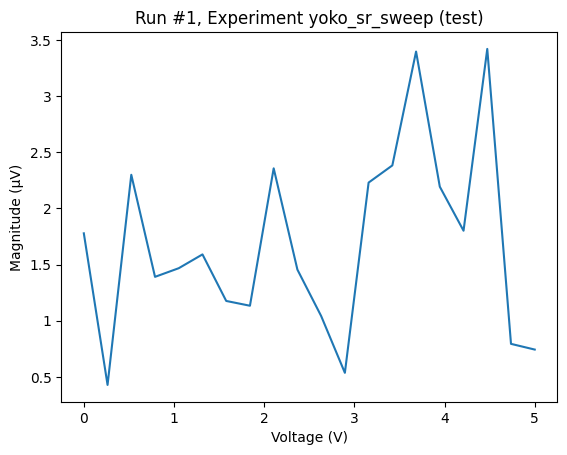

In [8]:
# run experiment

# let lockin stabilize
sleep(2)
axes = do1d(
    v.voltage,
    START,
    STOP,
    SAMPLES,
    INT_TIME,
    li.R,
    do_plot=True,
    show_progress=True,
    exp=test_sweep,
)

In [9]:
v.output(0)